In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cmath
from cmath import e
from numpy.lib.type_check import real
from scipy.optimize import curve_fit


In [8]:
C = 67e-8
L = 2.2e-3
Resonance = 1/(np.sqrt(C*L))
OmegaTheory = np.linspace(10, 100000, 1000)
OmegaTheory = OmegaTheory*2*np.pi

def compliance(U,V, deltaPhi):
    return C*(V/U)*np.exp(-1*1j*deltaPhi)

def compNorm(U,V):
    return C*(V/U)

def compTheory(omega, C, L, Q):
    return C/(1-(omega/(1/np.sqrt(C*L)))**2 + 1j*(omega/(1/(np.sqrt(C*L))))*(1/Q))

def compNormtheory(J):
    return [cmath.polar(j)[0] for j in J]

#pop, cov = curve_fit(compTheory())


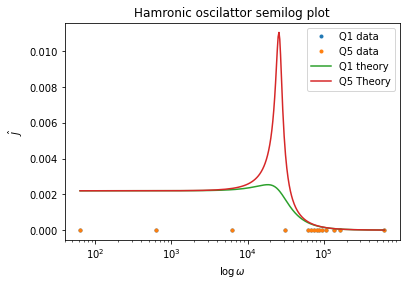

TypeError: compTheory() missing 2 required positional arguments: 'L' and 'Q'

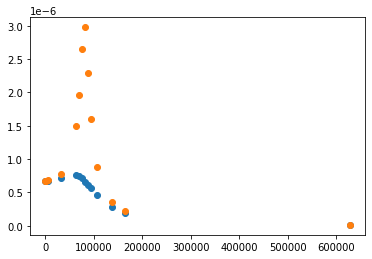

: 

In [10]:
Q1data = pd.read_csv("Harmonic data Q1.csv", sep = ",")
Q5data = pd.read_csv("Harmonic data2 Q5.csv", sep = ",")

plt.semilogx(Q1data["Frequency (Hz)"]*2*np.pi, compNorm(Q1data['U(V)'],Q1data['V(V)']), '.', label = 'Q1 data')
plt.semilogx(Q5data["Frequency (Hz)"]*2*np.pi, compNorm(Q5data['U(V)'],Q5data['V(V)']), '.', label = 'Q5 data')
plt.semilogx(OmegaTheory, compNormtheory(compTheory(OmegaTheory, L, C,1)), label = 'Q1 theory' )
plt.semilogx(OmegaTheory, compNormtheory(compTheory(OmegaTheory, L, C,5)), label = 'Q5 Theory')
plt.legend()
plt.title('Hamronic oscilattor semilog plot')
plt.xlabel(r'$\log{\omega}$')
plt.ylabel(r'$\hat{J}$', rotation = 90)
plt.show()

plt.plot(Q1data["Frequency (Hz)"]*2*np.pi, compNorm(Q1data['U(V)'],Q1data['V(V)']), 'o', label = 'Q1 data')
plt.plot(Q5data["Frequency (Hz)"]*2*np.pi, compNorm(Q5data['U(V)'],Q5data['V(V)']), 'o', label = 'Q5 data')
plt.plot(OmegaTheory, compNormtheory(compTheory(OmegaTheory, 1)), label = 'Q1 theory' )
plt.plot(OmegaTheory, compNormtheory(compTheory(OmegaTheory, 5)), label = 'Q5 Theory')
plt.legend()
plt.title('Hamronic oscilattor plot')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\hat{J}$', rotation = 90)
plt.show()